# A Preliminary Study on the Interrelationships Among Sleep, Stress, and Physical Activity

<p align="right">--By Group 31 WIX1007</p>

## 1.Preparation: Import Dataset from google drive

In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
file_path = "/content/drive/MyDrive/WIA1007_Project/unclean_smartwatch_health_data.csv"
df = pd.read_csv(file_path)

## 2.Preprocessing
### 2.1 Data Cleaning
### 2.1.1 Check the basic information of the dataset

In [3]:
df.info()

print("\nMissing value")
print(df.isnull().sum())

print("\nUnique Category")
print(df['Activity Level'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User ID                 9799 non-null   float64
 1   Heart Rate (BPM)        9600 non-null   float64
 2   Blood Oxygen Level (%)  9700 non-null   float64
 3   Step Count              9900 non-null   float64
 4   Sleep Duration (hours)  9850 non-null   object 
 5   Activity Level          9800 non-null   object 
 6   Stress Level            9800 non-null   object 
dtypes: float64(4), object(3)
memory usage: 547.0+ KB

Missing value
User ID                   201
Heart Rate (BPM)          400
Blood Oxygen Level (%)    300
Step Count                100
Sleep Duration (hours)    150
Activity Level            200
Stress Level              200
dtype: int64

Unique Category
['Highly Active' 'Highly_Active' 'Actve' 'Seddentary' 'Sedentary' 'Active'
 nan]


#### 2.1.2 Pre-processing: Drop Irrelavent Columns & Casting Data Type

In [4]:
df = df.drop(columns=['Heart Rate (BPM)', 'Blood Oxygen Level (%)'], errors='ignore')

In [5]:
df['Sleep Duration (hours)'] = pd.to_numeric(df['Sleep Duration (hours)'], errors='coerce')

#### 2.1.3 Eliminating Outliers in Step Count

First we visualize the distribution and outliers of the column. Thus we can decide in what way we clean the outliers.

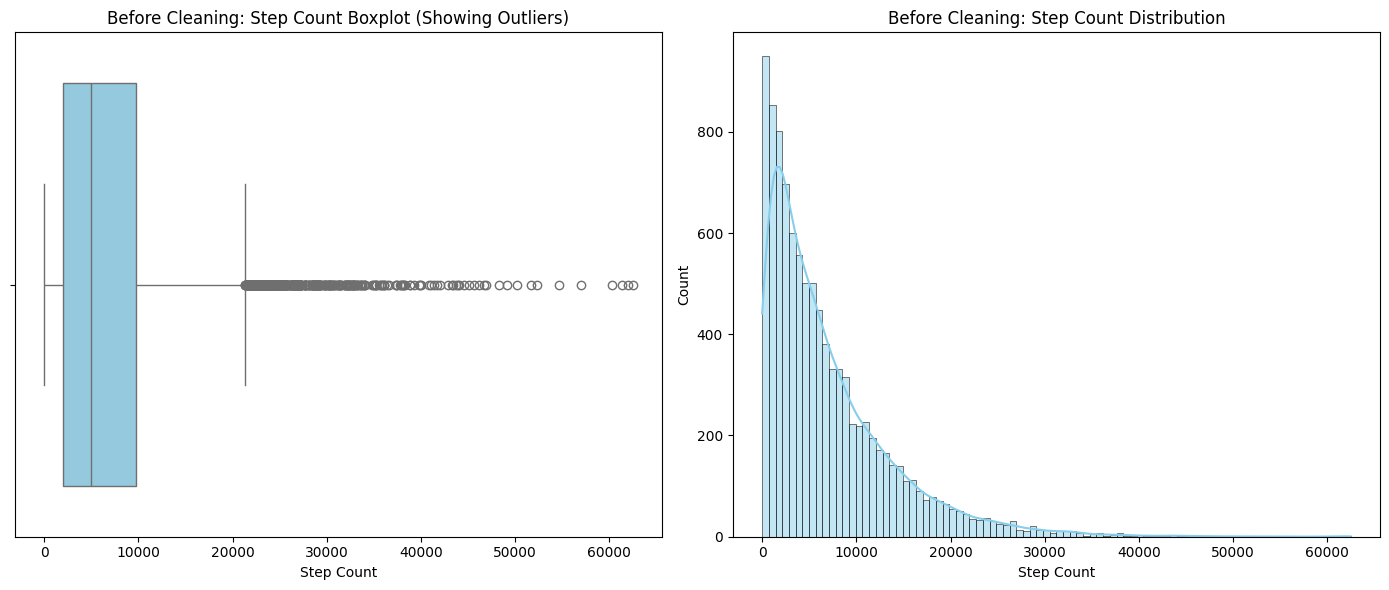

In [6]:
# figure 1
plt.figure(figsize=(14, 6))

# subplot: boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Step Count'], color='skyblue')
plt.title('Before Cleaning: Step Count Boxplot (Showing Outliers)')
plt.xlabel('Step Count')

# sublot: histogram
plt.subplot(1, 2, 2)
sns.histplot(df['Step Count'], kde=True, color='skyblue')
plt.title('Before Cleaning: Step Count Distribution')
plt.xlabel('Step Count')

plt.tight_layout()
plt.show()

Using the Boxplot analysis, we identified significant outliers in the Step Count variable. The histogram showed a highly skewed distribution.

In [7]:
Q1 = df['Step Count'].quantile(0.25)
Q3 = df['Step Count'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [8]:
df = df[(df['Step Count'] >= lower_bound) & (df['Step Count'] <= upper_bound)]

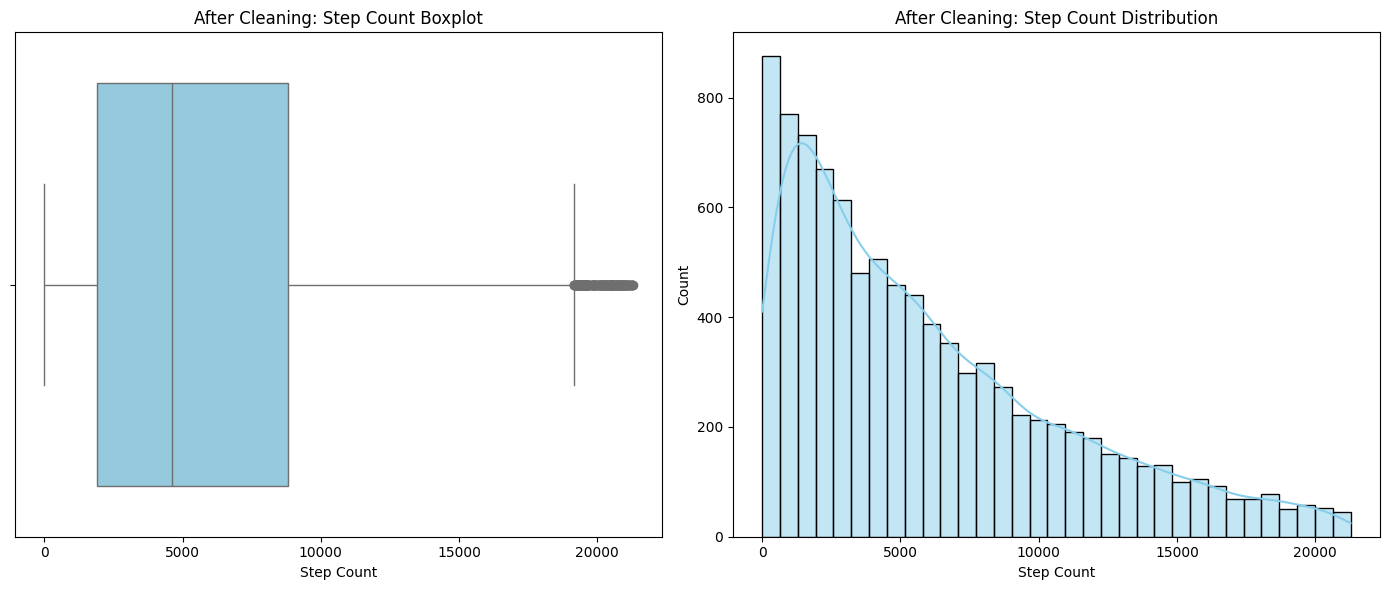

In [9]:
# Plot again to show the post-cleaning distribution
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['Step Count'], color='skyblue')
plt.title('After Cleaning: Step Count Boxplot')
plt.xlabel('Step Count')
plt.subplot(1, 2, 2)
sns.histplot(df['Step Count'], kde=True, color='skyblue')
plt.title('After Cleaning: Step Count Distribution')
plt.xlabel('Step Count')

plt.tight_layout()
plt.show()

 By applying the IQR method (1.5 * IQR), we successfully lower the percentage of extreme values that likely resulted from sensor errors, non-standard usage or overexercising users, while keeping the distribution pattern similar to the original.

#### 2.1.4 Filling the missing value: Median & Mode

In [11]:
df['Activity Level'] = df['Activity Level'].str.replace('_', ' ').replace({'Actve': 'Active', 'Seddentary': 'Sedentary'})

In [12]:
df['Sleep Duration (hours)'] = df['Sleep Duration (hours)'].fillna(df['Sleep Duration (hours)'].median())
df['Activity Level'] = df['Activity Level'].fillna(df['Activity Level'].mode()[0])
df['Stress Level'] = df['Stress Level'].fillna(df['Stress Level'].mode()[0])


In [13]:
df = df.drop_duplicates()

In [14]:
df = df.dropna(subset=['User ID'])

In [16]:
df.head()

,User ID,Step Count,Sleep Duration (hours),Activity Level,Stress Level
0,4174.0,5450.390578,7.167236,Highly Active,1
2,1860.0,2826.521994,6.498778,Highly Active,5
3,2294.0,13797.338044,7.367790,Active,3
4,2130.0,15679.067648,6.498778,Highly Active,6
5,2095.0,10205.992256,8.378343,Highly Active,10


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9259 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User ID                 9259 non-null   float64
 1   Step Count              9259 non-null   float64
 2   Sleep Duration (hours)  9259 non-null   float64
 3   Activity Level          9259 non-null   object 
 4   Stress Level            9259 non-null   object 
dtypes: float64(3), object(2)
memory usage: 434.0+ KB


We have dropped 8% of rows, which is a relatively small amount.

In [19]:
output_path = "/content/drive/MyDrive/WIA1007_Project/cleaned_smartwatch_health_data.csv"
df.to_csv(output_path, index=False)

### 2.2 Data Integration

In [20]:
file_path = "/content/drive/MyDrive/WIA1007_Project/Mental_Health_Lifestyle_Dataset.csv"
df2 = pd.read_csv(file_path)

In [22]:
df2.head()

,Country,Age,Gender,Exercise Level,Diet Type,Sleep Hours,Stress Level,Mental Health Condition,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score
0,Brazil,48,Male,Low,Vegetarian,6.3,Low,NaN,21,4.0,7.8,6.5
1,Australia,31,Male,Moderate,Vegan,4.9,Low,PTSD,48,5.2,8.2,6.8
2,Japan,37,Female,Low,Vegetarian,7.2,High,NaN,43,4.7,9.6,9.7
3,Brazil,35,Male,Low,Vegan,7.2,Low,Depression,43,2.2,8.2,6.6
4,Germany,46,Male,Low,Balanced,7.3,Low,Anxiety,35,3.6,4.7,4.4


The column `Exercise Level` is similar to the column `Activity Level`. We rename it for integrating.

In [23]:
df2 = df2.rename(columns={
    'Exercise Level': 'Activity Level',
    'Sleep Hours': 'Sleep Duration (hours)'
})


In [24]:
df2 = df2[['Activity Level', 'Sleep Duration (hours)', 'Stress Level']]

In [25]:
df2['Sleep Duration (hours)'] = df2['Sleep Duration (hours)'].fillna(df2['Sleep Duration (hours)'].median())
df2['Activity Level'] = df2['Activity Level'].fillna(df2['Activity Level'].mode()[0])
df2['Stress Level'] = df2['Stress Level'].fillna(df2['Stress Level'].mode()[0])
#fill missing value

Numeralize the `Stress Level`. (In the other two tables, this column is numerical)

In [26]:
stress = {'Low': 2, 'Moderate': 5, 'High': 8}
df2['Stress Level'] = df2['Stress Level'].map(stress)

#### 2.2.1 Cleaning

The data in the other two tables are relatively clean. However, for the sake of rigor, we still apply IQR to eliminate outliers.

In [29]:
Q1 = df2['Sleep Duration (hours)'].quantile(0.25)
Q3 = df2['Sleep Duration (hours)'].quantile(0.75)
IQR = Q3 - Q1
df2 = df2[(df2['Sleep Duration (hours)'] >= (Q1 - 1.5 * IQR)) & (df2['Sleep Duration (hours)'] <= (Q3 + 1.5 * IQR))]

In [30]:
df2 = df2.drop_duplicates()

In [31]:
df2.head()

,Activity Level,Sleep Duration (hours),Stress Level
0,Low,6.3,2
1,Moderate,4.9,2
2,Low,7.2,8
3,Low,7.2,2
4,Low,7.3,2


In [32]:
output_path = "/content/drive/MyDrive/WIA1007_Project/cleaned_Mental_Health_Lifestyle_Dataset.csv"
df2.to_csv(output_path, index=False)

In [33]:
file_path = "/content/drive/MyDrive/WIA1007_Project/expanded_sleep_data_with_bio.csv"
df3 = pd.read_csv(file_path)

In [34]:
df3 = df3.rename(columns={
    'Physical Activity Level': 'Activity Level',
    'Sleep Duration': 'Sleep Duration (hours)'
})


In [35]:
df3 = df3[['Activity Level', 'Sleep Duration (hours)', 'Stress Level', 'Quality of Sleep']]

In [36]:
for col in df3.columns:
    df3[col] = df3[col].fillna(df3[col].median())

In [37]:
for col in ['Sleep Duration (hours)', 'Activity Level']:
    Q1 = df3[col].quantile(0.25)
    Q3 = df3[col].quantile(0.75)
    IQR = Q3 - Q1
    df3 = df3[(df3[col] >= (Q1 - 1.5 * IQR)) & (df3[col] <= (Q3 + 1.5 * IQR))]

In [38]:
df3 = df3.drop_duplicates()

In [40]:
df3.head()

,Activity Level,Sleep Duration (hours),Stress Level,Quality of Sleep
0,42,6.1,6,6
1,60,6.2,8,6
3,30,5.9,8,4
6,40,6.3,7,6
7,75,7.8,6,7


In [41]:
output_path = "/content/drive/MyDrive/WIA1007_Project/cleaned_expanded_sleep_data_with_bio.csv"
df3.to_csv(output_path, index=False)

#### 2.2.2 Concatenation
Now we are going to concatenate 3 tables together. Notice that we have